In [1]:
#"Importing libraries."
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv("insurance.csv") #I read the file insurance.csv using pandas.

In [3]:
df.head() # I want to check that the file was loaded correctly and display the first 5 rows.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape #"I want to check the dimensions of the DataFrame and see the size of the dataset."

(1338, 7)

In [5]:
df.info() #I want to display a summary of the dataset to see column names, data types, and non-missing values."

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum() #"I want to check if there are any missing values in the dataset."

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum() #"I want to check for any duplicate rows in the dataset."

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True) #Removing duplicate rows is part of data preprocessing


In [9]:
print("Min of age :",df['age'].min())  #"I want to find the minimum and maximum values in the 'age' column."
print("Max of age :",df['age'].max())

Min of age : 18
Max of age : 64


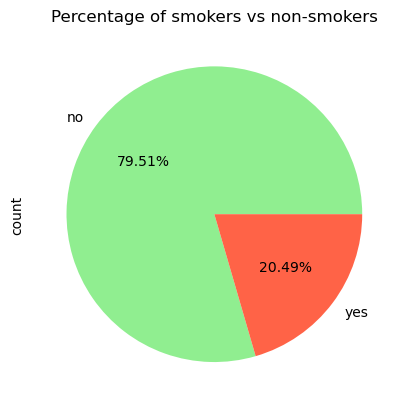

In [10]:
df['smoker'].value_counts().plot(kind='pie',autopct='%.2f%%',colors=['lightgreen', 'tomato'])
colors=['lightgreen', 'tomato']
plt.title("Percentage of smokers vs non-smokers")   #"To visualize the percentage of smokers and non-smokers in the dataset."
plt.show()


In [11]:
numeric_features = ["age", "bmi", "children"]       #numeric_features
categorical_features = ["sex", "smoker", "region"]  #categorical_features
target = "charges"

# Features and Target
X = df[numeric_features + categorical_features]
y = df[target]

In [12]:
X = df.drop('charges', axis=1)    #"Splitting the data into features and target."
y = df['charges']  

In [13]:
#"Splitting the data into training and testing sets."
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#"The code performs data preprocessing before training the model, converting numeric and categorical columns into a format suitable for the model."
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),         
        ("cat", OneHotEncoder(drop="first"), categorical_features)  
    ]
)

pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

X_train_processed = pipeline.fit_transform(X_train)

X_test_processed = pipeline.transform(X_test)

print("train", X_train_processed.shape)
print("test", X_test_processed.shape)


train (1069, 8)
test (268, 8)


In [15]:
#"Creating a machine learning model."
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)


In [16]:
#"Training the model."
rf_model.fit(X_train_processed, y_train)


RandomForestRegressor(random_state=42)

In [17]:
#"Testing the model."
y_pred = rf_model.predict(X_test_processed)

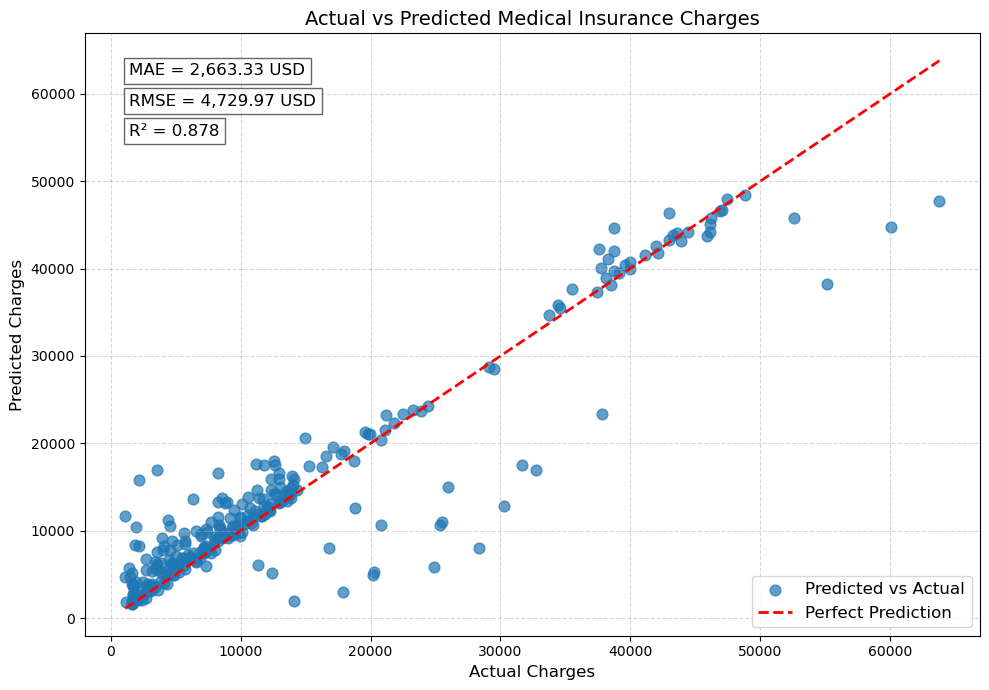

In [18]:
#Mean (Absolute Error) 

#MSE (Mean Squared Error) 

#RMSE (Root Mean Squared Error) 

#R² (Coefficient of Determination)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10,7))

plt.scatter(y_test, y_pred, alpha=0.7, color='#1f77b4', s=60, label='Predicted vs Actual')

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect Prediction')

plt.text(0.05, 0.95, f'MAE = {mae:,.2f} USD', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.05, 0.90, f'RMSE = {rmse:,.2f} USD', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
plt.text(0.05, 0.85, f'R² = {r2:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.xlabel("Actual Charges", fontsize=12)
plt.ylabel("Predicted Charges", fontsize=12)
plt.title("Actual vs Predicted Medical Insurance Charges", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
